In [13]:
import pypylon.pylon as py
from PIL import Image
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [14]:
camera = py.InstantCamera(py.TlFactory.GetInstance().CreateFirstDevice())
camera.Open()
camera.PixelFormat.SetValue("BayerRG8")
camera.ExposureAuto.SetValue("Continuous")

camera.GainAuto.SetValue("Continuous")

camera.StartGrabbing(1)
grab = camera.RetrieveResult(2000, py.TimeoutHandling_ThrowException)
if grab.GrabSucceeded():
    img = grab.Array



camera.Close()

In [15]:


#global_threshold
#_,thresh1 = cv2.threshold(img, 120, 255, cv2.THRESH_BINARY)
#_,thresh2 = cv2.threshold(img,120,255,cv2.THRESH_BINARY_INV)

#adaptive_threshold

#thresh3 = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY,11,2)
#thresh4 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY,11,2)

#images = [img,thresh1,thresh2,thresh3,thresh4 ]
#titles = ["Greyscale","Binary","Binary Inverse","Adaptive Mean","Adaptive Gaussian"]

#sobel edge detection
sobel_x = cv2.Sobel(img, cv2.CV_64F, 1, 0, ksize=5)
sobel_y = cv2.Sobel(img, cv2.CV_64F, 0, 1, ksize=5)
sobel_combined = cv2.magnitude(sobel_x, sobel_y)

#canny edge detection
canny_edges = cv2.Canny(img, 100, 200)

images = [img, sobel_x, sobel_y, sobel_combined, canny_edges]
titles = ["Original", "Sobel X", "Sobel Y", "Sobel Combined", "Canny Edges"]


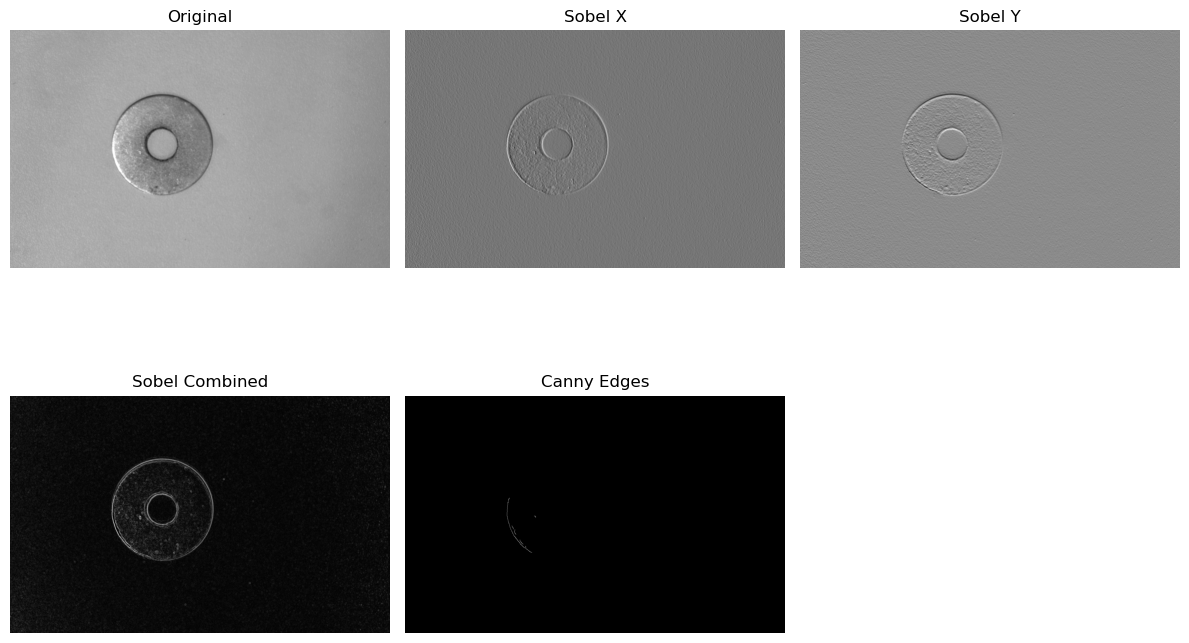

In [16]:
plt.figure(figsize=(12,8))
for i in range(len(images)):
    plt.subplot(2,3,i+1)
    plt.title(titles[i])
    plt.imshow(images[i],cmap='gray')
    plt.axis('off')
plt.tight_layout()
plt.show()
